<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/Do_it!_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EC%9D%84_%EC%9C%84%ED%95%9C_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EC%9E%85%EB%AC%B8_pg_241~_242%2C_256~263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12-2) datetime 오브젝트

- datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리
- date 오브젝트: 날짜를 처리
- time 오브젝트: 시간을 처리
- datetime 오브젝트: 날짜와 시간 모두 처리

# datetime 오브젝트 사용하기

1. datetime 오브젝트를 사용하기 위해 datetime 라이브러러리 불러오기

In [17]:
from datetime import datetime

2. now, today 메서드를 사용하면 다음과 같이현재 시간 출력 가능 

In [18]:
now1 = datetime.now()
print(now1)

2022-10-08 14:01:31.204407


In [19]:
now2 = datetime.today()
print(now2)

2022-10-08 14:01:31.217454


3. datetime 오브젝트 생성 시 시간을 직접 입력하여 인자로 전달

In [20]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2022-10-08 14:01:31.232979
1970-01-01 00:00:00
1970-12-12 13:24:34


4. datetime 오브젝트를 이용해 시간 계산: 두 datetime 오브젝트의 차이 구하기 

In [21]:
diff1 = t1-t2
print(diff1)
print(type(diff1))

19273 days, 14:01:31.232979
<class 'datetime.timedelta'>


In [22]:
diff2 = t2-t1
print(diff2)
print(type(diff2))

-19274 days, 9:58:28.767021
<class 'datetime.timedelta'>


# datetiem 오브젝트로 변환하기: to_datetime 메서드


> - 시계열 데이터를 문자열로 저장해야 할 때, 문자열은 시간 계산을 할 수 없으므로 datetime 오브젝트로 변환해야 함
- to_datetime 메서드를 사용해 문자열을 datetime 오브젝트로 변환



1. 먼저 ebola 데이터 집합을 불러옴

In [23]:
import pandas as pd
import os

# 테슬라 주식 데이터로 시간 계산하기

- pandas-datareader 라이브러리를 이요해 주식 데이터를 불러옴

In [24]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. get_data_quanal 메서드에 TSLA 문자열을 전달해 테슬라 주식 데이터 받기
2. to_csv 메서드를 사용해 data 폴더 안에 'tesla_stock_quandl.csv'라는 이름으로 저장

In [28]:
pd.core.common.is_list_like=pd.api.types.is_list_like
import pandas_datareader as pdr

#tesla에 데이터 프레임이 저장
tesla = pdr.get_data_quandl('TSLA', api_key = '1AyRUyiu96D-zTb3CbDL')

#tesla에 저장된 데이터프레임을 파일로 저장
tesla.to_csv('/content/sample_data/tesla_stock_quandl.csv')

2. tesla 데이터프레임의 Date 열은 문자열로 저장되어 있어, datetime 오브젝트 로 자료형을 변환해야 시간을 계산할 수 있다. 

In [30]:
print(tesla.head())

              Open    High     Low   Close      Volume  ExDividend  \
Date                                                                 
2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
Date                                                                    
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0  
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0  
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0  
2018-03-22         1.0   313.89   318.82  308.18    309.10   4914307.0  
2018-03-21         1.0   310.25   322.44  310.19    316.53   5927881.0 

3. Date열을 Datetime으로 변환: read_csv 메서드로 데이터 집합을 불러올 때 parse_dates인자에 Date열을 전달

In [31]:
tesla=pd.read_csv('/content/sample_data/tesla_stock_quandl.csv',parse_dates=[0]) # parse_dates인자에 Date열을 전달
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        116 non-null    datetime64[ns]
 1   Open        116 non-null    float64       
 2   High        116 non-null    float64       
 3   Low         116 non-null    float64       
 4   Close       116 non-null    float64       
 5   Volume      116 non-null    float64       
 6   ExDividend  116 non-null    float64       
 7   SplitRatio  116 non-null    float64       
 8   AdjOpen     116 non-null    float64       
 9   AdjHigh     116 non-null    float64       
 10  AdjLow      116 non-null    float64       
 11  AdjClose    116 non-null    float64       
 12  AdjVolume   116 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 11.9 KB
None


In [36]:
tesla.tail()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
111,2017-10-13,356.98,358.49,353.6800,355.57,3528413.0,0.0,1.0,356.98,358.49,353.6800,355.57,3528413.0
112,2017-10-12,352.95,359.78,352.6400,355.68,4047318.0,0.0,1.0,352.95,359.78,352.6400,355.68,4047318.0
113,2017-10-11,353.89,357.60,351.1500,354.60,4476769.0,0.0,1.0,353.89,357.60,351.1500,354.60,4476769.0
114,2017-10-10,346.80,355.63,345.5305,355.59,6914972.0,0.0,1.0,346.80,355.63,345.5305,355.59,6914972.0
115,2017-10-09,349.65,351.75,342.6700,342.94,7406324.0,0.0,1.0,349.65,351.75,342.6700,342.94,7406324.0


4. Date 열의 자료형이 Datetime 오브젝트로 변환됨. dt 접근자를 사용해 불린 추출로 2010년 6월 데이터만 추출

In [37]:
print(tesla.loc[(tesla.Date.dt.year == 2017) & (tesla.Date.dt.month == 10)]) # 2017년 자료가 가장 마지막이므로, 2010년 6월 추출이 안되어서 가장 옛날 데이터 2017년 10월 추출

          Date    Open      High       Low   Close     Volume  ExDividend  \
99  2017-10-31  320.23  331.9500  320.1800  331.53  5532647.0         0.0   
100 2017-10-30  319.18  323.7800  317.2500  320.08  4236029.0         0.0   
101 2017-10-27  319.75  324.5900  316.6600  320.87  6942493.0         0.0   
102 2017-10-26  327.78  330.2300  323.2000  326.17  4980316.0         0.0   
103 2017-10-25  336.70  337.5000  323.5600  325.84  8547764.0         0.0   
104 2017-10-24  338.80  342.8000  336.1600  337.34  4463807.0         0.0   
105 2017-10-23  349.88  349.9500  336.2500  337.02  5715817.0         0.0   
106 2017-10-20  352.69  354.5500  344.3400  345.10  4888221.0         0.0   
107 2017-10-19  355.56  357.1465  348.2000  351.81  5032884.0         0.0   
108 2017-10-18  355.97  363.0000  354.1300  359.65  4898808.0         0.0   
109 2017-10-17  350.91  356.2200  350.0700  355.75  3280670.0         0.0   
110 2017-10-16  353.76  354.4800  347.1600  350.60  5353262.0         0.0   

# datetime 오브젝트와 인덱스 - DatetimeIndex

- 대부분 데이터프레임의 행 번호를 인덱스로 사용했지만, datetime 오브젝트를 데이터 프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있음
- datetime 오브젝트를 인덱스로 지정해보자

# datetime 오브젝트를 인덱스로 설정해 데이터 추출하기

1. Date 열을 tesla 데이터 프레임의 인덱스로 지정

In [38]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2017-10-20', '2017-10-19', '2017-10-18', '2017-10-17',
               '2017-10-16', '2017-10-13', '2017-10-12', '2017-10-11',
               '2017-10-10', '2017-10-09'],
              dtype='datetime64[ns]', name='Date', length=116, freq=None)


2. datetime 오브젝트를 인덱스로 지정하면 같은 방법으로 원하는 시간의 데이터를 바로 추출할 수 있다.

In [39]:
print(tesla['2017'].iloc[:5,:5])

                 Date    Open      High     Low   Close
Date                                                   
2017-12-29 2017-12-29  316.18  316.4100  310.00  311.35
2017-12-28 2017-12-28  311.75  315.8200  309.54  315.36
2017-12-27 2017-12-27  316.00  317.6800  310.75  311.64
2017-12-26 2017-12-26  323.83  323.9400  316.58  317.29
2017-12-22 2017-12-22  329.51  330.9214  324.82  325.20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


3. 2017년 10월 데이터만 추출

In [40]:
print(tesla['2017-10'].iloc[:,:5])

                 Date    Open      High       Low   Close
Date                                                     
2017-10-31 2017-10-31  320.23  331.9500  320.1800  331.53
2017-10-30 2017-10-30  319.18  323.7800  317.2500  320.08
2017-10-27 2017-10-27  319.75  324.5900  316.6600  320.87
2017-10-26 2017-10-26  327.78  330.2300  323.2000  326.17
2017-10-25 2017-10-25  336.70  337.5000  323.5600  325.84
2017-10-24 2017-10-24  338.80  342.8000  336.1600  337.34
2017-10-23 2017-10-23  349.88  349.9500  336.2500  337.02
2017-10-20 2017-10-20  352.69  354.5500  344.3400  345.10
2017-10-19 2017-10-19  355.56  357.1465  348.2000  351.81
2017-10-18 2017-10-18  355.97  363.0000  354.1300  359.65
2017-10-17 2017-10-17  350.91  356.2200  350.0700  355.75
2017-10-16 2017-10-16  353.76  354.4800  347.1600  350.60
2017-10-13 2017-10-13  356.98  358.4900  353.6800  355.57
2017-10-12 2017-10-12  352.95  359.7800  352.6400  355.68
2017-10-11 2017-10-11  353.89  357.6000  351.1500  354.60
2017-10-10 201

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


# 시간 간격과 인덱스 - Timedeltaindex

# 시간 간격을 인덱스로 지정해 데이터 추출하기

1. Date 열에서 Date 열의 최솟값을 빼면 데이터를 수집한 이후에 시간이 얼마나 흘렀는지 알 수 있다. : Date 열에서 Date열의 최솟값을 뺀 다음 ref_date열로 추가

In [41]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

2. red_date 열을 인덱스로 지정, 시간 간격을 이용해 데이터 추출

In [42]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5,:5])

               Date    Open    High     Low   Close
ref_date                                           
169 days 2018-03-27  304.00  304.27  277.18  279.18
168 days 2018-03-26  307.34  307.59  291.36  304.18
165 days 2018-03-23  311.25  311.61  300.45  301.54
164 days 2018-03-22  313.89  318.82  308.18  309.10
163 days 2018-03-21  310.25  322.44  310.19  316.53


3. 데이터 수집 이후 최초 5일에 대한 데이터 추출

In [45]:
print(tesla['5 days':].iloc[:5,:5]) # ['5 days':] 인덱싱에 주의하자.

               Date    Open    High       Low   Close
ref_date                                             
4 days   2017-10-13  356.98  358.49  353.6800  355.57
3 days   2017-10-12  352.95  359.78  352.6400  355.68
2 days   2017-10-11  353.89  357.60  351.1500  354.60
1 days   2017-10-10  346.80  355.63  345.5305  355.59
0 days   2017-10-09  349.65  351.75  342.6700  342.94


# 시간 범위와 인덱스


> 특정 일에 누락된 데이터도 포함시켜 데이터를 살펴보기: 임의로 시간 범위를 생성해 인덱스로 지정



# 시간 범위 생성해 인덱스로 지정하기

1. 테슬라 주식 데이터는 누락 데이터가 없으므로, 에볼라 데이터 집합을 사용한다. : 가장 앞쪽에 데이터가 누락되어 있음을 알 수 있다.

In [46]:
from google.colab import files
myfile = files.upload()

Saving country_timeseries.csv to country_timeseries.csv


In [47]:
ebola = pd.read_csv('country_timeseries.csv', parse_dates=[0])

print(ebola.iloc[:5,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


2. 뒤쪽 데이터의 누락 확인하기

In [48]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


3. date_range 메서드: 2014년 12월 31일-2015년 1월 5일 사이의 시간 인덱스 생성

In [49]:
from pandas.io.stata import DatetimeIndex

head_range = pd.date_range(start='2014-12-31',end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


4. 원본 데이터 손상 방지를 위해 ebola 데이터 프레임의 앞 5개의 데이터 추출을 해 새로운 데이터 프레임 만들기 

> 이때, Date 열을 인덱스로 먼저 지정하지 않으면 오류가 발생함. Date열을 인덱스로 지정 후 3.에서 생성한 시간 범위를 인덱스로 지정해야 함.



In [50]:
ebola_5=ebola.head()
ebola_5.index=ebola_5['Date'] #  Date 열을 인덱스로 먼저 지정
ebola_5.reindex(head_range) # 3.에서 생성한 시간 범위를 인덱스로 지정
print(ebola_5.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


# 시간 범위의 주기 설정하기

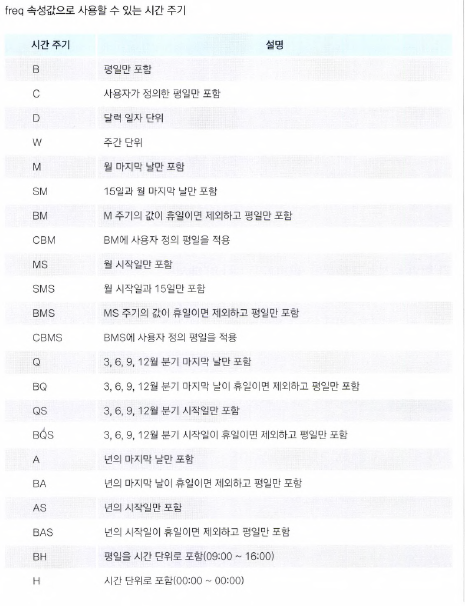